Copying images of male and females to seperate training, validation, and testing directories

In [2]:
import os, shutil

Source: https://www.kaggle.com/ashwingupta3012/male-and-female-faces-dataset
My github repository: https://github.com/osamayy515/Gender-classification.git

Paths to the directories where the original dataset exist

In [3]:
original_dataset_male_dir ='/home/osami/Male and Female face dataset/Male Faces'

In [4]:
original_dataset_female_dir ='/home/osami/Male and Female face dataset/Female Faces'

Directory where smaller dataset exist

In [5]:
base_dir ='/home/osami/Male and Female face dataset small'
os.mkdir(base_dir)

Directories for the training, validation, and test splits

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Directories with training male and female pictures

In [7]:
train_male_dir = os.path.join(train_dir, 'male')
os.mkdir(train_male_dir)

train_female_dir = os.path.join(train_dir, 'female')
os.mkdir(train_female_dir)

Directories with validation male and female pictures

In [8]:
validation_male_dir = os.path.join(validation_dir, 'male')
os.mkdir(validation_male_dir)

validation_female_dir = os.path.join(validation_dir, 'female')
os.mkdir(validation_female_dir)

Directories with testing male and female pictures

In [9]:
test_male_dir = os.path.join(test_dir, 'male')
os.mkdir(test_male_dir)

test_female_dir = os.path.join(test_dir, 'female')
os.mkdir(test_female_dir)

Copies the first 999 male images to train_male_dir

In [10]:
fnames = ['1 ({}).jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_male_dir, fname)
    dst = os.path.join(train_male_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500 male images to validation_male_dir

In [11]:
fnames = ['1 ({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_male_dir, fname)
    dst = os.path.join(validation_male_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500 male images to test_male_dir

In [12]:
fnames = ['1 ({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_male_dir, fname)
    dst = os.path.join(test_male_dir, fname)
    shutil.copyfile(src, dst)

Repeating above process for copying female images into their respective directories

In [30]:
fnames = ['0 ({}).jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_female_dir, fname)
    dst = os.path.join(train_female_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['0 ({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_female_dir, fname)
    dst = os.path.join(validation_female_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['0 ({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_female_dir, fname)
    dst = os.path.join(test_female_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
print('total training male images:', len(os.listdir(train_male_dir)))

total training male images: 999


importing suitable libraries for further operations

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

In [8]:
male_dir = '/home/osami/Male and Female face dataset small/train/male/'
female_dir = '/home/osami/Male and Female face dataset small/train/female/'

In [9]:
data_set_length = min(len(os.listdir(female_dir)),len(os.listdir(male_dir)))

9 random male images from the training dataset

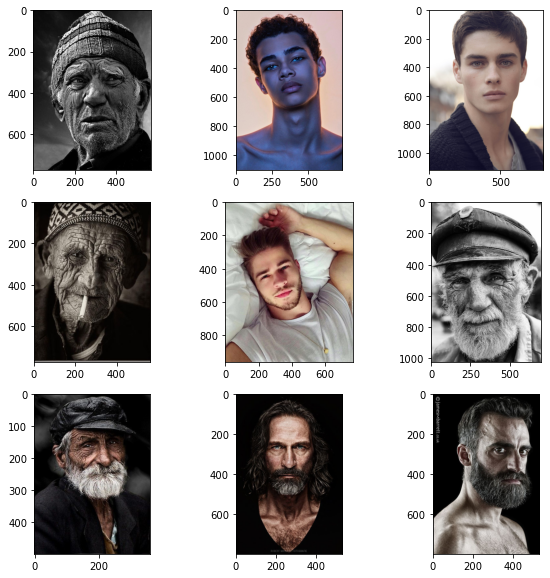

In [10]:
fig = plt.figure(figsize = (10,10))
i = 1
for index in np.random.randint(0,data_set_length,9): 
    ax = fig.add_subplot(3,3,i)
    img = Image.open(male_dir+os.listdir(male_dir)[index])
    plt.imshow(img)
    i += 1
plt.show()

9 random female images from the trainig dataset

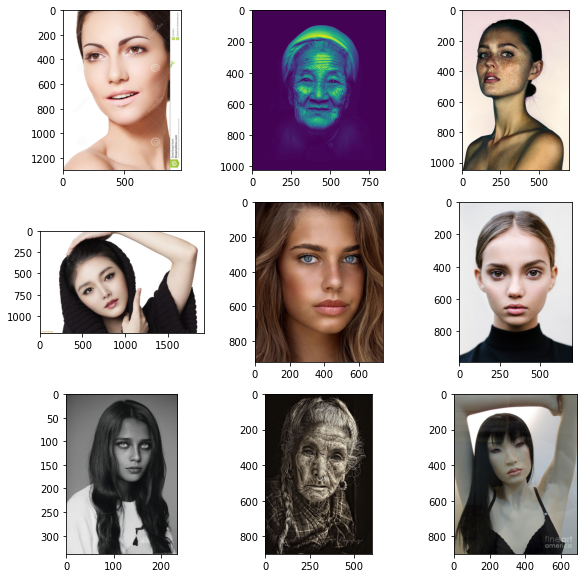

In [11]:
fig = plt.figure(figsize = (10,10))
i = 1
for index in np.random.randint(0,data_set_length,9): 
    ax = fig.add_subplot(3,3,i)
    img = Image.open(female_dir+os.listdir(female_dir)[index])
    plt.imshow(img)
    i += 1
plt.show()

In [32]:
print('total training female images:', len(os.listdir(train_female_dir)))

total training female images: 999


In [33]:
print('total validation male images:', len(os.listdir(validation_male_dir)))

total validation male images: 500


In [34]:
print('total validation female images:', len(os.listdir(validation_female_dir)))

total validation female images: 500


In [35]:
print('total test male images:', len(os.listdir(test_male_dir)))

total test male images: 500


In [36]:
print('total test female images:', len(os.listdir(test_female_dir)))

total test female images: 500


Building the network: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. The network is quite large because we’re dealing with bigger images and a more complex problem.

Because we’re attacking a binary-classification problem, we’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

#dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

For the compilation step, we’ll go with the RMSprop optimizer. Because we ended the network with a single sigmoid unit, we’ll use binary crossentropy as the loss.

In [39]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/home/osami/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets us quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what we’ll use here.

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,
                                                        class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3) ) and binary labels (shape (20,) ). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, we need to break the iteration loop at some point:

In [41]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Fitting the model using fit_generator. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, we can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [42]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                            validation_steps=50)

<ipython-input-42-e8f5bc63f424>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,


Epoch 1/30
100/100 [==============================] - 153s 2s/step - loss: 0.6383 - acc: 0.6316 - val_loss: 0.5546 - val_acc: 0.7290
Epoch 2/30
100/100 [==============================] - 135s 1s/step - loss: 0.5149 - acc: 0.7437 - val_loss: 0.4471 - val_acc: 0.7750
Epoch 3/30
100/100 [==============================] - 83s 827ms/step - loss: 0.4553 - acc: 0.7853 - val_loss: 0.4180 - val_acc: 0.7970
Epoch 4/30
100/100 [==============================] - 83s 826ms/step - loss: 0.3980 - acc: 0.8223 - val_loss: 0.3971 - val_acc: 0.8070
Epoch 5/30
100/100 [==============================] - 82s 822ms/step - loss: 0.3439 - acc: 0.8564 - val_loss: 0.3882 - val_acc: 0.8230
Epoch 6/30
100/100 [==============================] - 83s 834ms/step - loss: 0.3012 - acc: 0.8809 - val_loss: 0.2531 - val_acc: 0.9070
Epoch 7/30
100/100 [==============================] - 83s 829ms/step - loss: 0.2557 - acc: 0.9014 - val_loss: 0.2226 - val_acc: 0.9160
Epoch 8/30
100/100 [==============================] - 83s 8

Saving the model after training with accuracy of 99% which is a big achievement

In [81]:
model.save('male_and_female_small_1.h5')

Plotting the loss and accuracy of the model over the training and validation data during training

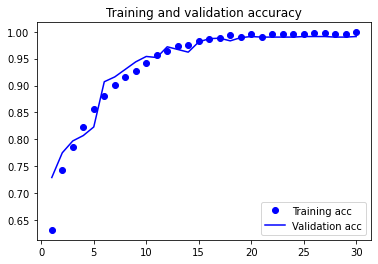

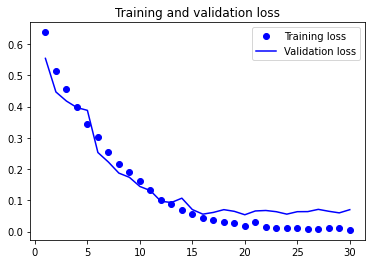

In [82]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using data augmentation. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

In [83]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Displaying some randomly augmented training images

In [94]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_male_dir, fname) for
fname in os.listdir(train_male_dir)]
img_path = fnames[20]
img = image.load_img(img_path, target_size=(150, 150))

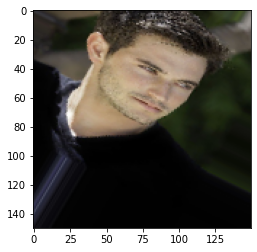

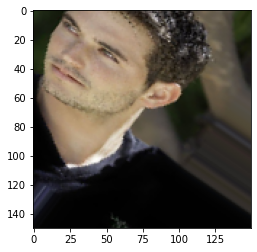

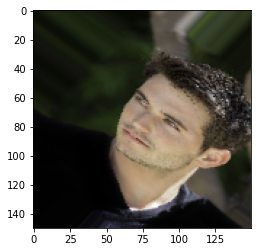

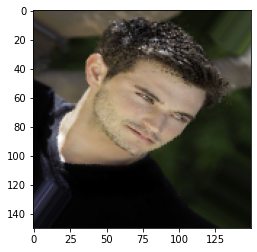

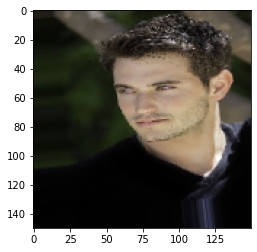

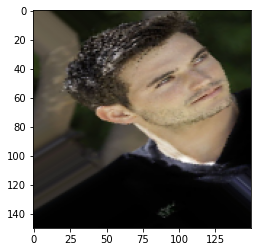

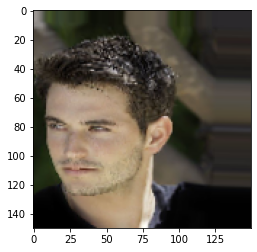

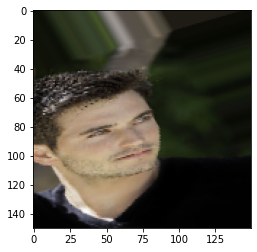

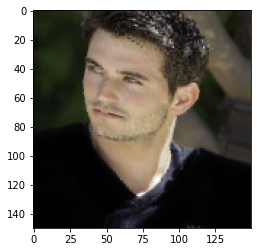

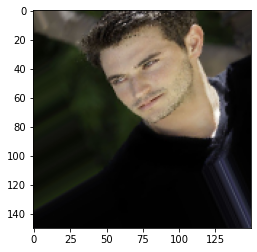

In [95]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break
plt.show()

If we train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images. We can’t produce new information, we can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, we’ll also add a Dropout layer to our model, right before the densely connected classifier.

In [96]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/home/osami/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Let’s train the network using data augmentation and dropout.

In [99]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)      #Note that the test data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,
                                                    class_mode='binary')   #Because you use binary_crossentropy loss,
                                                                           # you need binary labels.

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=60,epochs=100,validation_data=validation_generator,
                              validation_steps=50)

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-99-4b44e9560864>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=60,epochs=100,validation_data=validation_generator,


Epoch 1/100
60/60 [==============================] - 87s 1s/step - loss: 0.6504 - acc: 0.6204 - val_loss: 0.5803 - val_acc: 0.7050
Epoch 2/100
60/60 [==============================] - 62s 1s/step - loss: 0.6452 - acc: 0.6393
Epoch 3/100
60/60 [==============================] - 61s 1s/step - loss: 0.6365 - acc: 0.6383
Epoch 4/100
60/60 [==============================] - 61s 1s/step - loss: 0.6314 - acc: 0.6409
Epoch 5/100
60/60 [==============================] - 61s 1s/step - loss: 0.6175 - acc: 0.6703
Epoch 6/100
60/60 [==============================] - 62s 1s/step - loss: 0.6117 - acc: 0.6620
Epoch 7/100
60/60 [==============================] - 61s 1s/step - loss: 0.5987 - acc: 0.6856
Epoch 8/100
60/60 [==============================] - 62s 1s/step - loss: 0.5819 - acc: 0.6903
Epoch 9/100
60/60 [==============================] - 61s 997ms/step - loss: 0.5744 - acc: 0.6930
Epoch 10/100
60/60 [==============================] - 61s 1s/step - loss: 0.5661 - acc: 0.7010
Epoch 11/100
60/60 

Saving the model for prediction on random unseen images

In [100]:
model.save('male_and_female_small_2.h5')